In [1]:
from PIL import Image
from IPython.display import display
import torch as th

def inverse_normalize(img, mean=(0.48145466, 0.4578275, 0.40821073), std=(0.26862954, 0.26130258, 0.27577711)):
    """
    :param img: numpy array. shape (C, H, W). [-1~1]
    :return: numpy array. shape (height, width, channel). [0~1]
    """
    for i in range(3):
        img[:, i,:, :] = ((img[:, i,:,:]) * std[i]) + mean[i]

    return img*255

def show_images(batch: th.Tensor):
    """ Display a batch of images inline. """
    scaled = inverse_normalize(batch, (0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711)).round().clamp(0,255).to(th.uint8).cpu()
    reshaped = scaled.permute(2, 0, 3, 1).reshape([batch.shape[2], -1, 3])
    display(Image.fromarray(reshaped.numpy()))

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


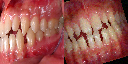

In [37]:
from gita.data.teeth_img import PairedTeethImageData
import torch


data = PairedTeethImageData('/home/yewon/GITA/dataset/train', img_size=64, condi_size=64, istrain=True, condi_aug_level=0.3)
for batch, cond in data:
    batch = batch[None, ...]
    cond = cond['condi_img'][None, ...]
    show_images(torch.concat([batch, cond], axis=-1))
    break